In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
%matplotlib inline

In [2]:
path='../input/ieee-fraud-detection/'

In [3]:
train1=pd.read_csv(path+'train_transaction.csv')
train2=pd.read_csv(path+'train_identity.csv')

test1=pd.read_csv(path+'test_transaction.csv')
test2=pd.read_csv(path+'test_identity.csv')


In [4]:
train = pd.merge(train2, train1, on='TransactionID', how='left')
test = pd.merge(test2, test1, on='TransactionID', how='left')

print("train shape:",train.shape)
print("test shape:",test.shape)

train shape: (144233, 434)
test shape: (141907, 433)


In [5]:
del train1 , train2, test1, test2

0    132915
1     11318
Name: isFraud, dtype: int64

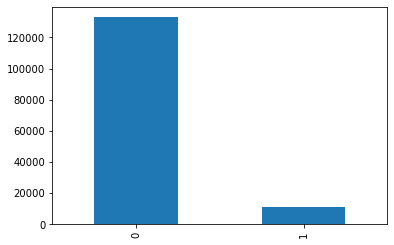

In [6]:
train['isFraud'].value_counts().plot(kind='bar')
train['isFraud'].value_counts()

In [7]:
from sklearn.utils import resample

train_m = train[train.isFraud==0]
train_n= train[train.isFraud==1]
 
# Downsample majority class
train_m1 = resample(train_m, replace=False,    # sample without replacement
                 n_samples=45000,     # to match minority class
                 random_state=42) # reproducible results
 
# Combine minority class with downsampled majority class
train = pd.concat([train_m1, train_n])
 
# Display new class counts
train.isFraud.value_counts()

0    45000
1    11318
Name: isFraud, dtype: int64

In [8]:
del train_m1, train_n ,train_m

0    45000
1    11318
Name: isFraud, dtype: int64

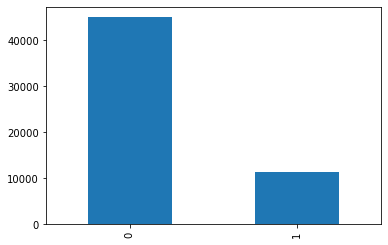

In [9]:
train['isFraud'].value_counts().plot(kind='bar')
train['isFraud'].value_counts()

In [10]:
train.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
63206,3145415,0.0,110049.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124068,3480036,-5.0,342980.0,0.0,0.0,5.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46820,3096059,0.0,34972.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64418,3151813,-5.0,21703.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,0.0,0.0,125.0,0.0,0.0,125.0,0.0,0.0,0.0,0.0
39668,3083565,-5.0,31183.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train.shape

(56318, 434)

In [12]:
test.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,0.0,0.0,310.0,90.0,0.0,310.0,90.0,0.0,0.0,0.0
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
test.shape

(141907, 433)

[](http://)# **FE**

In [14]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other',
          'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 
          'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 'spectrum',
          'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 
          'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 'web.de': 'other',
          'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other', 'hotmail.fr': 'microsoft', 
          'windstream.net': 'other', 'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 
          'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other', 'roadrunner.com': 'other',
          'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink',
          'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo',
          'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft',
          'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other',
          'hotmail.es': 'microsoft', 'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo',
          'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 'juno.com': 'other', 
          'icloud.com': 'apple'}

us_emails = ['gmail', 'net', 'edu']


for c in ['P_emaildomain', 'R_emaildomain']:
    train[c + '_bin'] = train[c].map(emails)
    test[c + '_bin'] = test[c].map(emails)
    
    train[c + '_suffix'] = train[c].map(lambda x: str(x).split('.')[-1])
    test[c + '_suffix'] = test[c].map(lambda x: str(x).split('.')[-1])
    
    train[c + '_suffix'] = train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    test[c + '_suffix'] = test[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

In [15]:
train['nulls1'] = train.isna().sum(axis=1)
test['nulls1'] = test.isna().sum(axis=1)

features selected based on sweetviz and viz from https://www.kaggle.com/cdeotte/eda-for-columns-v-and-id#D-Columns

In [16]:
cols = list(train.columns )
cols.remove('TransactionDT')
for c in ['D6','D7','D8','D9','D12','D13','D14']:
    cols.remove(c)

for c in ['card4','C3','M5','id_08','id_33','id_07','id_14','id_21','id_30','id_32','id_34']:
    cols.remove(c)
    
for c in ['id_'+str(x) for x in range(22,28)]:
    cols.remove(c)

In [17]:
for c in ['V'+str(x) for x in range(1,340)]:
    cols.remove(c)

In [18]:
numerical = ["TransactionAmt", "nulls1", "dist1", "dist2"] + ["C" + str(i) for i in range(1, 15)] + \
            ["D" + str(i) for i in range(1, 16)]
for c in ['D6','D7','D8','D9','D12','D13','D14']:
    numerical.remove(c)


In [19]:
categorical = ["ProductCD",  "addr1", "addr2",
               "P_emaildomain_bin", "P_emaildomain_suffix", "R_emaildomain_bin", "R_emaildomain_suffix",
               "DeviceInfo", "DeviceType"]+["card" + str(i) for i in range(1, 7)] + \
                ["id_0" + str(i) for i in range(1,10)] + \
                ["id_" + str(i) for i in range(10, 39)] + \
                ["M" + str(i) for i in range(1, 10)]


for c in ['id_'+str(x) for x in range(22,28)]:
    categorical.remove(c)
for c in ['id_'+str(x) for x in['03','04','07','08','09',10,14,18,21]]:
    categorical.remove(c)

In [20]:
print('length of numerical:',len(numerical))
print('length of categorical:',len(categorical))

length of numerical: 26
length of categorical: 47


In [21]:
col=numerical+categorical

In [22]:
len(col)

73

In [23]:
train=train[numerical+categorical+['isFraud']]
print(train.shape)
train.reset_index(drop=True)
train.head()

(56318, 74)


,TransactionAmt,nulls1,dist1,dist2,C1,C2,C3,C4,C5,C6,...,M1,M2,M3,M4,M5,M6,M7,M8,M9,isFraud
63206,30.782,93,NaN,NaN,2.0,5.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,0
124068,5.472,135,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,M2,NaN,NaN,NaN,NaN,NaN,0
46820,100.000,133,NaN,NaN,1.0,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
64418,100.000,56,NaN,2395.0,2.0,5.0,0.0,5.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
39668,50.000,127,NaN,NaN,2.0,2.0,0.0,1.0,0.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [24]:
from sklearn.metrics import recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, auc
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")
import itertools
from scipy import interp

In [25]:
from fastai.tabular import *
from sklearn.metrics import roc_auc_score

def auroc_score(input, target):
    input, target = input.cpu().numpy()[:,1], target.cpu().numpy()
    return roc_auc_score(target, input)

In [26]:
d={}
for i in range(1,39):
    if i<10:
        k="id-0"+str(i)
        v="id_0"+ str(i)
        d[k]=v
        #
    else:
        k="id-"+str(i)
        v="id_"+ str(i)
        d[k]=v
        #test.rename(columns={"id-"+str(i): "id_"+str(i)} )


In [27]:
test=test.rename(columns=d)

In [28]:
test.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,V335,V336,V337,V338,V339,P_emaildomain_bin,P_emaildomain_suffix,R_emaildomain_bin,R_emaildomain_suffix,nulls1
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,microsoft,com,microsoft,com,107
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,310.0,90.0,0.0,0.0,0.0,NaN,nan,google,com,58
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,other,com,other,com,107
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,microsoft,com,microsoft,com,98
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,microsoft,com,microsoft,com,106


In [29]:
test=test[col]
len(test.columns)

73

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141907 entries, 0 to 141906
Data columns (total 73 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionAmt        141907 non-null  float64
 1   nulls1                141907 non-null  int64  
 2   dist1                 0 non-null       float64
 3   dist2                 36428 non-null   float64
 4   C1                    141904 non-null  float64
 5   C2                    141904 non-null  float64
 6   C3                    141904 non-null  float64
 7   C4                    141904 non-null  float64
 8   C5                    141904 non-null  float64
 9   C6                    141904 non-null  float64
 10  C7                    141904 non-null  float64
 11  C8                    141904 non-null  float64
 12  C9                    141904 non-null  float64
 13  C10                   141904 non-null  float64
 14  C11                   141904 non-null  float64
 15  

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56318 entries, 63206 to 144229
Data columns (total 74 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionAmt        56318 non-null  float64
 1   nulls1                56318 non-null  int64  
 2   dist1                 0 non-null      float64
 3   dist2                 15211 non-null  float64
 4   C1                    56318 non-null  float64
 5   C2                    56318 non-null  float64
 6   C3                    56318 non-null  float64
 7   C4                    56318 non-null  float64
 8   C5                    56318 non-null  float64
 9   C6                    56318 non-null  float64
 10  C7                    56318 non-null  float64
 11  C8                    56318 non-null  float64
 12  C9                    56318 non-null  float64
 13  C10                   56318 non-null  float64
 14  C11                   56318 non-null  float64
 15  C12           

In [32]:
dp=['M1','M2','M3','M5','M6','M7','M8','M9','D11','dist1','D2','D3','D5']

In [33]:
train=train.drop(dp, axis=1)
test=test.drop(dp, axis=1)

In [34]:
train.head()

,TransactionAmt,nulls1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,M4,isFraud
63206,30.782,93,NaN,2.0,5.0,0.0,1.0,0.0,1.0,1.0,...,Generic/Android 7.0,NaN,NaN,NaN,F,F,T,T,M2,0
124068,5.472,135,NaN,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,M2,0
46820,100.000,133,NaN,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,mobile safari 10.0,32.0,2048x1536,match_status:1,T,F,T,T,NaN,0
64418,100.000,56,2395.0,2.0,5.0,0.0,5.0,0.0,2.0,0.0,...,chrome 63.0,24.0,1366x768,match_status:2,T,F,T,F,NaN,0
39668,50.000,127,NaN,2.0,2.0,0.0,1.0,0.0,2.0,0.0,...,chrome 63.0,24.0,1440x900,match_status:2,T,F,T,F,NaN,0


In [35]:
gd=['ProductCD','P_emaildomain_bin','P_emaildomain_suffix','R_emaildomain_bin','R_emaildomain_suffix',
   'DeviceInfo','DeviceType','card4','card6','id_12','id_15','id_16','id_28','id_29',
   'id_34','id_35','id_36','id_37','id_38','M4']

In [36]:
train=train.ffill()
test=test.ffill()

In [37]:
train=train.bfill()
test=test.bfill()

In [38]:
sum(train.isnull().sum())

0

In [39]:
devbin=list(train['DeviceInfo'].astype(str))
for i  in range(len(devbin)):
    if devbin[i]=='Windows':
        pass
    elif devbin[i]=='iOS Device':
        pass
    elif devbin[i]=='MacOS':
        pass
    elif devbin[i]=='Trident/7.0':
        pass
    else:
        devbin[i]='mobile&other'
        
devbin2=list(test['DeviceInfo'].astype(str))
for i  in range(len(devbin2)):
    if devbin2[i]=='Windows':
        pass
    elif devbin2[i]=='iOS Device':
        pass
    elif devbin2[i]=='MacOS':
        pass
    elif devbin2[i]=='Trident/7.0':
        pass
    else:
        devbin2[i]='mobile&other'

In [40]:
train['DeviceInfo']=devbin
print('train:',set(train['DeviceInfo']))
test['DeviceInfo']=devbin2
print('test: ',set(test['DeviceInfo']))

train: {'Windows', 'MacOS', 'iOS Device', 'Trident/7.0', 'mobile&other'}
test:  {'Windows', 'MacOS', 'iOS Device', 'Trident/7.0', 'mobile&other'}


In [41]:
for ele in gd:
    print(test[ele].value_counts())

C    65627
R    35568
H    29316
S    11396
Name: ProductCD, dtype: int64
google         62657
microsoft      34007
other          22454
yahoo          14170
aol             4527
apple           2175
att             1599
spectrum         215
centurylink      103
Name: P_emaildomain_bin, dtype: int64
com    120604
nan     11660
us       5560
mx       1822
es        750
fr        606
de        573
uk        265
jp         67
Name: P_emaildomain_suffix, dtype: int64
google         64650
microsoft      32619
other          24283
yahoo          12668
aol             3886
apple           2295
att             1212
spectrum         179
centurylink      115
Name: R_emaildomain_bin, dtype: int64
com    123255
nan      9797
us       4785
mx       1822
es        752
fr        599
de        575
uk        253
jp         69
Name: R_emaildomain_suffix, dtype: int64
Windows         55296
mobile&other    44532
iOS Device      22665
MacOS           13496
Trident/7.0      5918
Name: DeviceInfo, dtype: int

In [42]:
for ele in gd:
    print(train[ele].value_counts())

C    26084
R    13683
H    12218
S     4333
Name: ProductCD, dtype: int64
google         24759
microsoft      13627
other           8976
yahoo           5752
aol             1694
apple            765
att              573
spectrum         113
centurylink       59
Name: P_emaildomain_bin, dtype: int64
com    47640
nan     5105
us      2198
mx       696
es       294
fr       167
de       160
uk        47
jp        11
Name: P_emaildomain_suffix, dtype: int64
google         25062
microsoft      13278
other           9413
yahoo           5686
aol             1459
apple            911
att              411
spectrum          64
centurylink       34
Name: R_emaildomain_bin, dtype: int64
com    48556
nan     4647
us      1739
mx       699
es       292
fr       171
de       156
uk        45
jp        13
Name: R_emaildomain_suffix, dtype: int64
Windows         22344
mobile&other    16096
iOS Device       9252
MacOS            5380
Trident/7.0      3246
Name: DeviceInfo, dtype: int64
desktop    3326

In [43]:
del devbin , devbin2

In [44]:
train=train.drop(['id_30','id_31','id_33'],axis=1)
test=test.drop(['id_30','id_31','id_33'],axis=1)

In [45]:
train.head()

,TransactionAmt,nulls1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_28,id_29,id_32,id_34,id_35,id_36,id_37,id_38,M4,isFraud
63206,30.782,93,2395.0,2.0,5.0,0.0,1.0,0.0,1.0,1.0,...,New,NotFound,32.0,match_status:1,F,F,T,T,M2,0
124068,5.472,135,2395.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Found,Found,32.0,match_status:1,F,F,T,F,M2,0
46820,100.000,133,2395.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,New,NotFound,32.0,match_status:1,T,F,T,T,M2,0
64418,100.000,56,2395.0,2.0,5.0,0.0,5.0,0.0,2.0,0.0,...,Found,Found,24.0,match_status:2,T,F,T,F,M2,0
39668,50.000,127,2395.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,...,Found,Found,24.0,match_status:2,T,F,T,F,M2,0


In [46]:
test.shape

(141907, 57)

In [47]:
df = pd.concat([train, test],ignore_index=True)
print(df.shape)
df.head()

(198225, 58)


,TransactionAmt,nulls1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_28,id_29,id_32,id_34,id_35,id_36,id_37,id_38,M4,isFraud
0,30.782,93,2395.0,2.0,5.0,0.0,1.0,0.0,1.0,1.0,...,New,NotFound,32.0,match_status:1,F,F,T,T,M2,0.0
1,5.472,135,2395.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Found,Found,32.0,match_status:1,F,F,T,F,M2,0.0
2,100.000,133,2395.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,New,NotFound,32.0,match_status:1,T,F,T,T,M2,0.0
3,100.000,56,2395.0,2.0,5.0,0.0,5.0,0.0,2.0,0.0,...,Found,Found,24.0,match_status:2,T,F,T,F,M2,0.0
4,50.000,127,2395.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,...,Found,Found,24.0,match_status:2,T,F,T,F,M2,0.0


In [48]:
'''for ele in df.columns:
    if df[ele].dtype=='float64':
        df[ele]=df[ele].astype(int)'''

"for ele in df.columns:\n    if df[ele].dtype=='float64':\n        df[ele]=df[ele].astype(int)"

In [50]:
gd

['ProductCD',
 'P_emaildomain_bin',
 'P_emaildomain_suffix',
 'R_emaildomain_bin',
 'R_emaildomain_suffix',
 'DeviceInfo',
 'DeviceType',
 'card4',
 'card6',
 'id_12',
 'id_15',
 'id_16',
 'id_28',
 'id_29',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'M4']

In [51]:
df=pd.get_dummies(df,drop_first=True)
df.shape

(198225, 98)

In [52]:
df.head()

,TransactionAmt,nulls1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_29_NotFound,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_35_T,id_36_T,id_37_T,id_38_T,M4_M1,M4_M2
0,30.782,93,2395.0,2.0,5.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0,0,1,1,0,1
1,5.472,135,2395.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,1
2,100.000,133,2395.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1,0,1,0,1,0,1,1,0,1
3,100.000,56,2395.0,2.0,5.0,0.0,5.0,0.0,2.0,0.0,...,0,0,0,1,1,0,1,0,0,1
4,50.000,127,2395.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,...,0,0,0,1,1,0,1,0,0,1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198225 entries, 0 to 198224
Data columns (total 98 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   TransactionAmt                 198225 non-null  float64
 1   nulls1                         198225 non-null  int64  
 2   dist2                          198225 non-null  float64
 3   C1                             198225 non-null  float64
 4   C2                             198225 non-null  float64
 5   C3                             198225 non-null  float64
 6   C4                             198225 non-null  float64
 7   C5                             198225 non-null  float64
 8   C6                             198225 non-null  float64
 9   C7                             198225 non-null  float64
 10  C8                             198225 non-null  float64
 11  C9                             198225 non-null  float64
 12  C10                           

In [54]:
train=pd.DataFrame(df.iloc[:56318,:])
test= pd.DataFrame(df.iloc[56318:,:])

In [55]:
train.reset_index()
train.head()

,TransactionAmt,nulls1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_29_NotFound,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_35_T,id_36_T,id_37_T,id_38_T,M4_M1,M4_M2
0,30.782,93,2395.0,2.0,5.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0,0,1,1,0,1
1,5.472,135,2395.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,0,1,0,0,0,1,0,0,1
2,100.000,133,2395.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1,0,1,0,1,0,1,1,0,1
3,100.000,56,2395.0,2.0,5.0,0.0,5.0,0.0,2.0,0.0,...,0,0,0,1,1,0,1,0,0,1
4,50.000,127,2395.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,...,0,0,0,1,1,0,1,0,0,1


In [59]:
test.reset_index()
test.head()

,TransactionAmt,nulls1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_29_NotFound,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_35_T,id_36_T,id_37_T,id_38_T,M4_M1,M4_M2
56318,6.271,107,37.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,0,1,0,0,1,0,0,1
56319,50.000,58,37.0,4.0,8.0,0.0,4.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,1,0,1
56320,37.318,107,37.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,0,1,0,1,1,0,0,1
56321,6.271,98,37.0,2.0,4.0,0.0,3.0,0.0,3.0,3.0,...,0,0,0,1,0,0,1,0,0,1
56322,52.258,106,37.0,8.0,21.0,0.0,4.0,0.0,4.0,4.0,...,1,0,0,1,0,0,1,0,0,1


In [60]:
test=test.drop(['isFraud'],axis=1)
test.shape

(141907, 97)

In [61]:
print(set(train['isFraud']))

{0.0, 1.0}


In [62]:
devbin=list(train['isFraud'].astype(int))
for i  in range(len(devbin)):
    if devbin[i]==0.0:
        devbin[i]=0
        
    elif devbin[i]==1.0:
        devbin[i]=1


train['isFraud']=devbin
print(set(train['isFraud']))

{0, 1}


### ***Model***

In [63]:
y=train['isFraud']
X=train.drop(['isFraud'],axis=1)


In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [67]:
wts={0:0.22, 1:0.78}

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10,max_depth=4, criterion = 'entropy', class_weight=wts ,random_state = 0)
clf.fit(x_train, y_train)

RandomForestClassifier(class_weight={0: 0.22, 1: 0.78}, criterion='entropy',
                       max_depth=4, n_estimators=10, random_state=0)

In [69]:
y_pred= clf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[7886, 1142],
       [ 525, 1711]])

In [75]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=clf, X=X , y=y , cv=10) 
print(acc)
print(acc.mean())
acc.std()

[0.82777  0.851562 0.847301 0.844105 0.838423 0.856357 0.856712 0.85032  0.851536 0.855088]
0.8479173761371708


0.008620325836902558

In [79]:
from xgboost import XGBClassifier
clf=XGBClassifier(n_estimators=450,reg_lambda=0.1,max_depth=5,learning_rate=0.3,
                  tree_method='gpu_hist', gpu_id=0,scale_pos_weight=4)
clf.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan,
              monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
              n_estimators=450, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=0.1, scale_pos_weight=4, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [80]:
y_pred= clf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[8739,  289],
       [ 230, 2006]])

In [76]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [300,350] ,'max_depth':[5,4],'reg_lambda':[0.1]}] 
grid_search = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('done')
print(best_accuracy)
best_parameters

done
0.9491276251223549


{'max_depth': 5, 'n_estimators': 350, 'reg_lambda': 0.1}

In [81]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=clf, X=x_train , y=y_train , cv=10) 
print(acc)
print(acc.mean())
acc.std()


[0.956502 0.949179 0.954949 0.953174 0.951609 0.952053 0.950055 0.954051 0.950499 0.951387]
0.9523459754979549


0.0021880975118646027

In [82]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print("roc_auc_score: ",roc_auc_score(y_test,y_pred))
print(classification_report(y_test, y_pred,target_names=['NOT_fraud','is_Fraud']))

roc_auc_score:  0.9325631131292588
              precision    recall  f1-score   support

   NOT_fraud       0.97      0.97      0.97      9028
    is_Fraud       0.87      0.90      0.89      2236

    accuracy                           0.95     11264
   macro avg       0.92      0.93      0.93     11264
weighted avg       0.95      0.95      0.95     11264



In [85]:
test.head()

,TransactionAmt,nulls1,dist2,C1,C2,C3,C4,C5,C6,C7,...,id_29_NotFound,id_34_match_status:0,id_34_match_status:1,id_34_match_status:2,id_35_T,id_36_T,id_37_T,id_38_T,M4_M1,M4_M2
56318,6.271,107,37.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,0,1,0,0,1,0,0,1
56319,50.000,58,37.0,4.0,8.0,0.0,4.0,0.0,0.0,0.0,...,0,0,0,1,1,0,1,1,0,1
56320,37.318,107,37.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,0,1,0,1,1,0,0,1
56321,6.271,98,37.0,2.0,4.0,0.0,3.0,0.0,3.0,3.0,...,0,0,0,1,0,0,1,0,0,1
56322,52.258,106,37.0,8.0,21.0,0.0,4.0,0.0,4.0,4.0,...,1,0,0,1,0,0,1,0,0,1


In [84]:
y_pred = clf.predict(test)
y_pred.shape

(141907,)

In [89]:
sub=pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv')
print(sub.shape)
sub.head()

(506691, 2)


,TransactionID,isFraud
0,3663549,0.5
1,3663550,0.5
2,3663551,0.5
3,3663552,0.5
4,3663553,0.5


In [ ]:
pred=pd.DataFrame(y_pred2)
datasets=pd.concat([ID,pred], axis=1)

datasets.columns =['id', 'sentiment_class']
datasets.to_csv('lgbm32.csv',index=False)